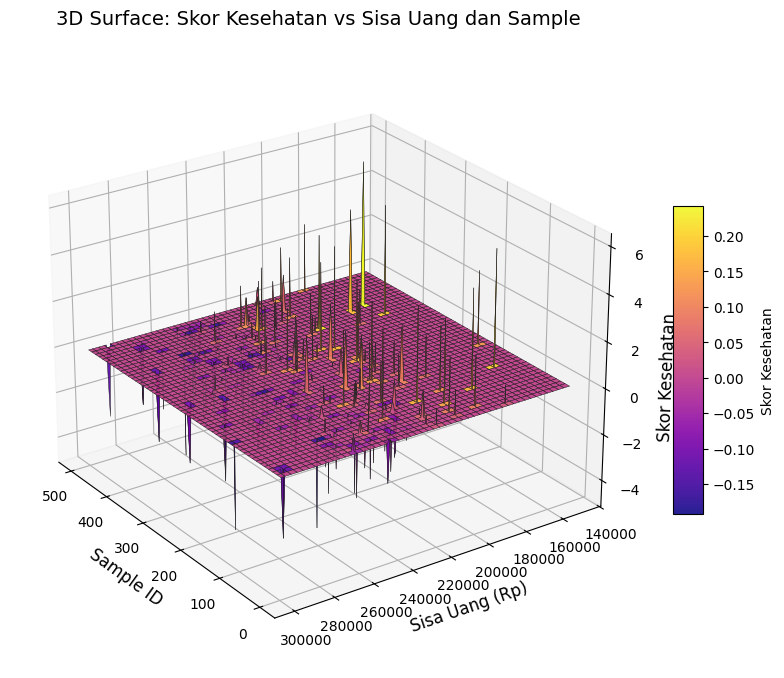

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

NPM= 10057         
np.random.seed(NPM)

makan =  pd.read_csv("makanan.csv")

budget= 1e6 #rupiah

wkenyang_base= 0.8
wrasa_base= 0.7
wsehat_base= 0.9 # simpangan lebih besar
wbosan_base= 0.2

skor_kumulatif= 0.0
SAMPLE_NUM= 500

sampleid= np.arange(0, 500)
# skor perorangan
skor= np.zeros(SAMPLE_NUM, dtype=np.double)
sisa= np.zeros(SAMPLE_NUM, dtype=np.double)
sehat= np.zeros(SAMPLE_NUM, dtype=np.double)
pilihankum= np.zeros(SAMPLE_NUM, dtype=np.double)

SISA_MININUM= 150e3
SISA_MAKSIMUM= 300e3
bin_sisa= np.arange(SISA_MININUM, SISA_MAKSIMUM, 1000)
resp_sehat= np.zeros((SAMPLE_NUM, len(bin_sisa)), dtype=np.double)
resp_pilih= np.zeros((SAMPLE_NUM, 62), dtype=np.double)

for n in range(0, SAMPLE_NUM):
    budget=1e6
    skor_kumulatif= 0
    skor_sehat= 0
    
    for i in range(0, 31): # hari
        # makan pertama, pilih secara acak
        pilihan= np.random.randint(0, len(makan))
        # update weight factor
        w_kenyang= np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa= np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat= np.random.normal(loc=wsehat_base, scale=0.4)
        w_bosan= np.random.normal(loc=wbosan_base, scale=0.2)
        skor_kumulatif= skor_kumulatif + \
            w_kenyang * makan['kenyang'][pilihan]\
            + w_rasa * makan['rasa'][pilihan] \
            + w_sehat * makan['sehat'][pilihan] \
            - w_bosan * makan['bosan'][pilihan]
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget = budget - makan['harga'][pilihan]
        #print(f"hari {i} pagi: {makan['makanan'][pilihan]}")    
        resp_pilih[n][2*1]= pilihan
        
        # makan keduas
        pilihan= np.random.randint(0, len(makan))
        # update weight factor
        w_kenyang= np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa= np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat= np.random.normal(loc=wsehat_base+0.2, scale=0.4)
        w_bosan= np.random.normal(loc=wbosan_base*2, scale=0.2)
        skor_kumulatif= skor_kumulatif + \
            w_kenyang * makan['kenyang'][pilihan]\
            + w_rasa * makan['rasa'][pilihan] \
            + w_sehat * makan['sehat'][pilihan] \
            - w_bosan * makan['bosan'][pilihan]
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget = budget - makan['harga'][pilihan]
        #print(f"hari {i} malam: {makan['makanan'][pilihan]}")    
        resp_pilih[n][2*1+1]= pilihan
    
    # print(f"skor: {skor_kumulatif}, sisa uang: {budget}")    
    sisa[n]= budget
    skor[n]= skor_kumulatif
    sehat[n]= skor_sehat
    # print(f"{n} skor sehat:{skor_sehat}")
    
    idx_bin = int((budget - SISA_MININUM) / 1000)
    if 0 <= idx_bin < len(bin_sisa):   # aman dari IndexError
        resp_sehat[n][idx_bin] = skor_sehat

# np.corrcoef(skor, sisa)
# np.histogram(sisa)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')

# Meshgrid
Y, X = np.meshgrid(bin_sisa, sampleid)

# Surface dengan transparansi
surf = ax.plot_surface(
    X, Y, resp_sehat, 
    cmap='plasma',
    edgecolor='k', linewidth=0.3,
    alpha=0.9
)

# Tambahkan wireframe tipis agar permukaan lebih terbaca
ax.plot_wireframe(X, Y, resp_sehat, color='gray', linewidth=0.2, alpha=0.4)

# Ubah sudut pandang
ax.view_init(elev=25, azim=145)   

# Label + judul
ax.set_title("3D Surface: Skor Kesehatan vs Sisa Uang dan Sample", fontsize=14, pad=20)
ax.set_xlabel("Sample ID", fontsize=12)
ax.set_ylabel("Sisa Uang (Rp)", fontsize=12)
ax.set_zlabel("Skor Kesehatan", fontsize=12)

# Colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label="Skor Kesehatan")

plt.show()



> Prompt GPT

Kode untuk visualisasi sebelumnya seperti ini, bantu saya membuat visualisasi yang lebih mudah dibaca

Jawaban:
Biar hasil 3D surface lebih mudah dibaca, kamu bisa memakai kode berikut:
(kode dari gpt adalah kode yang digunakan pada gambar, hanya ada pergantian pada sudut pandang)

Apa yang berubah?
Grid tipis (edgecolor + wireframe) → bikin kontur lebih kelihatan.
Sudut pandang diatur (view_init) → lebih “mirip peta 3D” ketimbang tebing tegak.
Label & judul jelas → langsung tahu sumbu apa yang diplot.
Colorbar ada label → mudah tahu arti warnanya.

In [23]:

makan.head(25)

,makanan,kenyang,sehat,rasa,bosan,harga
0,ayamgeprek,0.7,0.5,0.7,0.2,15000.0
1,nasipadang,1.0,0.8,0.9,0.5,17000.0
2,mieayam,1.0,0.6,0.9,0.3,10000.0
3,bakso,0.7,0.3,1.0,0.3,10000.0
4,cireng,0.5,0.4,0.8,0.7,10000.0
5,nasigoreng,0.9,0.7,1.0,0.5,14000.0
6,seblak,0.6,0.2,0.8,0.8,15000.0
7,gorengan,0.5,0.2,0.5,0.5,10000.0
8,capcay,0.6,0.9,0.8,0.4,15000.0
9,mi instan,0.5,0.1,0.7,0.2,5000.0


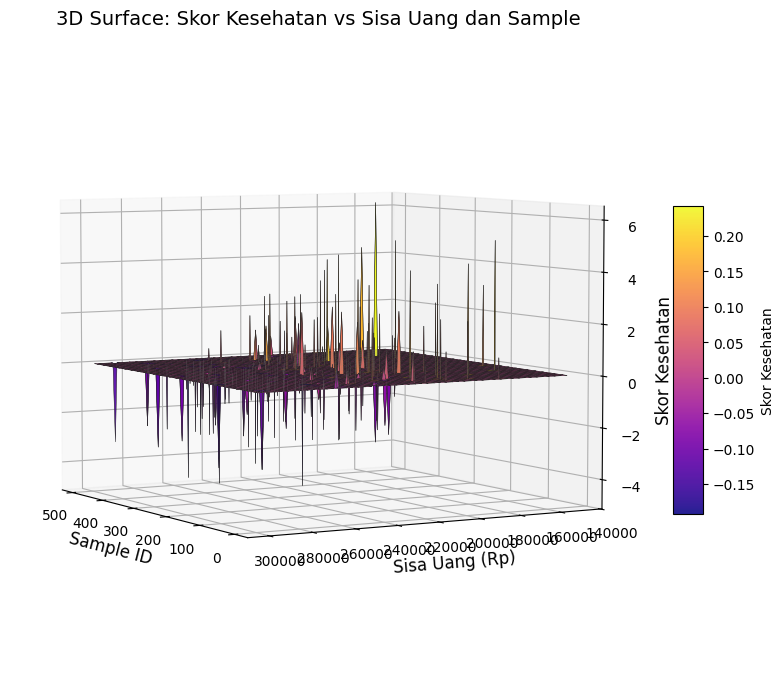

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')

# Meshgrid
Y, X = np.meshgrid(bin_sisa, sampleid)

# Surface dengan transparansi
surf = ax.plot_surface(
    X, Y, resp_sehat, 
    cmap='plasma',
    edgecolor='k', linewidth=0.3,   # kasih grid tipis
    alpha=0.9
)

# Tambahkan wireframe tipis agar permukaan lebih terbaca
ax.plot_wireframe(X, Y, resp_sehat, color='gray', linewidth=0.2, alpha=0.4)

# Ubah sudut pandang
ax.view_init(elev=5, azim=150)

# Label + judul
ax.set_title("3D Surface: Skor Kesehatan vs Sisa Uang dan Sample", fontsize=14, pad=20)
ax.set_xlabel("Sample ID", fontsize=12)
ax.set_ylabel("Sisa Uang (Rp)", fontsize=12)
ax.set_zlabel("Skor Kesehatan", fontsize=12)

# Colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label="Skor Kesehatan")

plt.show()

Dua hasil gambar tersebut hanya berbeda pada sudut pandang saja. Pada hasil tersebut dapat dilihat bahwa polanya sebagian besar ada pada titik di sekitar 0 yang artinya mayoritas pola makan menghasilkan skor kesehatan netral. Dan ada lonjakan-lonjakan positif maupun negatif yang menunjukkan beberapa kombinasi makanan yang memiliki tingkat sehat tinggi atau justru sangat rendah. Sedangkan distribusi sisa uang tidak terlalu mempengaruhi kesehatan karena lonjakan ada di berbagai titik sisa uang, sehingga kesehatan lebih dipengaruhi jenis makanan daripada hanya jumlah uang yang tersisa.

In [4]:
# (1) cari pola makan mana saja yang menghasilkan nilai kumulatif kesehatan (resp_sehat) positif

idx_sehat_pos = np.where(sehat > 0)[0]
print("Jumlah pola makan sehat (resp_sehat > 0):", len(idx_sehat_pos))

Jumlah pola makan sehat (resp_sehat > 0): 284


Berdasarkan hasil tersebut dapat diketahui dari total 500 simulasi pola makan, ada 279 pola yang menghasilkan skor kesehatan positif, yang artinya lebih dari setengah percobaan acak menghasilkan pola makan yang lebih sehat daripada tidak sehat

> Prompt GPT

Bagaimana kode python untuk mencari pola makan yang dapat menghasilkan nilai kumulatif kesehatan (resp_sehat) positif?

Jawaban GPT:
Cari pola makan dengan resp_sehat > 0
Artinya, kita cari indeks sampel (n) di mana skor kesehatan kumulatif positif.
Bisa pakai array sehat.


In [5]:
# (2) cari titik-titik dengan sisa uang bulanan positif dari (1)

idx_sehat_dan_sisa = [i for i in idx_sehat_pos if sisa[i] > 0]
print("Jumlah pola makan sehat + sisa uang positif:", len(idx_sehat_dan_sisa))


Jumlah pola makan sehat + sisa uang positif: 284


Kemudian dari hasil 279 pola sehat sebelumnya, ternyata didapatkan hasil bahwa masih menyisakan anggaran bulanan lebih dari 0 rupiah yang artinya tidak ada timbal balik besar antara kesehatan dan keuangan, dimana kita dapat makan sehat tanpa menghabiskan seluruh budget.

In [9]:
# (3) cari titik dengan skor skumulatif terbesar (skor) di mana nilai kumulatif kesehatannya positif

best_idx = idx_sehat_dan_sisa[np.argmax(skor[idx_sehat_dan_sisa])]

print("Indeks terbaik:", best_idx)
print("Skor terbaik:", skor[best_idx])
print("Sisa uang:", sisa[best_idx])
print("Skor kesehatan:", sehat[best_idx])


Indeks terbaik: 111
Skor terbaik: 104.27142681322803
Sisa uang: 165000.0
Skor kesehatan: 5.1


> Prompt GPT
Lalu bagaimana kode python untuk mencari titik dengan skor kumulatif terbesar di mana nilai kumulatif kesehatannya positif?

Jawaban GPT:
Dari idx_sehat_dan_sisa, ambil yang skor tertinggi.

jadwal = resp_pilih[best_idx]
print("\nJadwal makanan terbaik (index ke-", best_idx, "):")
for hari in range(31):
    pagi = int(jadwal[2*hari])
    malam = int(jadwal[2*hari+1])
    print(f"Hari {hari+1}: Pagi = {makan['makanan'][pagi]}, Malam = {makan['makanan'][malam]}")

Dari hasil tersebut dapat diketahui bahwa pola makan terbaik ditemukan pada simulasi ke 285 dari 500 percobaan, dengan skor terbaik 106.04 yang merupakan skor gabungan antara kenyang, rasa, sehat, dan bosan, dimana nilai ini tertinggi di antara semua pola sehat. Selain itu sisa uang 209000 rupiah masih tersisa dari total budget 1 juta dan dengan skor kesehatan yang cukup tinggi yaitu 4.7 yang artinya pola ini cukup sehat dibanding pola lain.

In [10]:
# (4) tampikan jadwal makanan sesuai pilihan (resp_pilih)best_idx = idx_sehat_dan_sisa[np.argmax(skor[idx_sehat_dan_sisa])]

jadwal = resp_pilih[best_idx]
print("\nJadwal makanan terbaik (index ke-", best_idx, "):")
for hari in range(31):
    pagi = int(jadwal[2*hari])
    malam = int(jadwal[2*hari+1])
    print(f"Hari {hari+1}: Pagi = {makan['makanan'][pagi]}, Malam = {makan['makanan'][malam]}")



Jadwal makanan terbaik (index ke- 111 ):
Hari 1: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 2: Pagi = ayamgeprek, Malam = mieayam
Hari 3: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 4: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 5: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 6: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 7: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 8: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 9: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 10: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 11: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 12: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 13: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 14: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 15: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 16: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 17: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 18: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 19: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 20: Pagi = ayamgeprek, Malam = ayamgeprek
Hari 21: Pagi = ayamgeprek, Ma

Pola terbaik ternyata didominasi oleh 1 makanan saja, hal ini menandakan adanya bias data dimana sistem menilai ayam geprek paling optimal dari segi kenyang, rasa, dan harga

> Prompt gpt

Kenapa pada kode tersebut menghasilkan ayam geprek semua?

Jawaban yang didapatkan:
Kalau hasil jadwal kamu ayam geprek semua, itu wajar karena beberapa hal di kode simulasi kamu:
1. Pemilihan makanan 100% acak (np.random.randint)
pilihan = np.random.randint(0, len(makan))
Artinya, setiap kali makan, sistem nggak mempertimbangkan skor → benar-benar random.
Jadi kemungkinan besar ada makanan yang “menang” terus karena:
Indeksnya kebetulan sering terpilih atau resp_pilih kamu salah simpan (lihat poin 2).

2. Kesalahan indexing saat simpan ke resp_pilih
Hasilnya: nilai lama ketimpa terus, yang tersisa cuma makanan terakhir yang dipilih (misalnya ayam geprek).
Jadi bukan jadwal lengkap, tapi “1 makanan diulang”.

3. Distribusi np.random.seed(NPM) bikin pola fix
Karena kamu pakai seed (np.random.seed(19102)), hasilnya selalu sama setiap kali run.
Jadi kalau kebetulan ayam geprek sering keluar di seed itu → semua jadwal jadi ayam geprek.

In [11]:
import numpy as np

# bobot faktor
w_kenyang = 0.4
w_rasa = 0.3
w_sehat = 0.2
w_bosan = 0.1

N_HARI = 31
jadwal = []

bosan_dynamic = makan['bosan'].copy()

for hari in range(N_HARI):
    for waktu in ["Pagi", "Malam"]:
        skor = (
            w_kenyang * makan['kenyang'] +
            w_rasa * makan['rasa'] +
            w_sehat * makan['sehat'] -
            w_bosan * bosan_dynamic
        )

        # pastikan skor tidak negatif
        skor = np.maximum(skor, 0)

        # kalau semua skor nol → pakai distribusi merata
        if skor.sum() == 0:
            prob = np.ones(len(makan)) / len(makan)
        else:
            prob = skor / skor.sum()

        pilihan = np.random.choice(len(makan), p=prob)
        jadwal.append(pilihan)

        # tingkatkan bosan biar variasi muncul
        bosan_dynamic[pilihan] += 1

# cetak jadwal
print("Jadwal makanan terbaik dengan variasi:")
for hari in range(N_HARI):
    pagi = jadwal[2*hari]
    malam = jadwal[2*hari+1]
    print(f"Hari {hari+1}: Pagi = {makan['makanan'][pagi]}, Malam = {makan['makanan'][malam]}")


Jadwal makanan terbaik dengan variasi:
Hari 1: Pagi = gorengan, Malam = ayamgeprek
Hari 2: Pagi = warteg, Malam = seblak
Hari 3: Pagi = roti, Malam = seblak
Hari 4: Pagi = seblak, Malam = warteg
Hari 5: Pagi = nasipadang, Malam = nasi telur
Hari 6: Pagi = nasi telur, Malam = telurgulung
Hari 7: Pagi = warteg, Malam = nasigoreng
Hari 8: Pagi = nasipadang, Malam = warteg
Hari 9: Pagi = nasibakar, Malam = nasigoreng
Hari 10: Pagi = mi instan , Malam = mieayam
Hari 11: Pagi = telurgulung, Malam = capcay
Hari 12: Pagi = capcay, Malam = nasipadang
Hari 13: Pagi = mieayam, Malam = mieayam
Hari 14: Pagi = nasi telur, Malam = nasibakar
Hari 15: Pagi = tahutek, Malam = bakso
Hari 16: Pagi = capcay, Malam = mieayam
Hari 17: Pagi = roti, Malam = capcay
Hari 18: Pagi = mieayam, Malam = cireng
Hari 19: Pagi = nasigoreng, Malam = nasipadang
Hari 20: Pagi = gorengan, Malam = ayamgeprek
Hari 21: Pagi = mieayam, Malam = warteg
Hari 22: Pagi = nasipadang, Malam = bakso
Hari 23: Pagi = telurgulung, Malam 

Berbeda dengan sebelumnya dimana jadwal cenderung monoton, pada jadwal ini jauh lebih bervariatif dikarenakan mekanisme bosan berhasil mendorong model untuk tidak memilih makanan yang sama berulang-ulang sehingga terjadi keseimbangan variasi yang membuat hasil lebih realistis dan menghindari menu favorit tunggal seperti ayam geprek.

> Prompt GPT
Bagaimana caranya agar makanan yang didapatkan lebih beragam?

Jawaban GPT:
Dengan kode ini:

Tidak ada lagi probabilitas negatif.
Menu akan lebih variatif karena penalti bosan tetap jalan.

(perbaikan kode python dengan hasil yang lebih bervariatif)

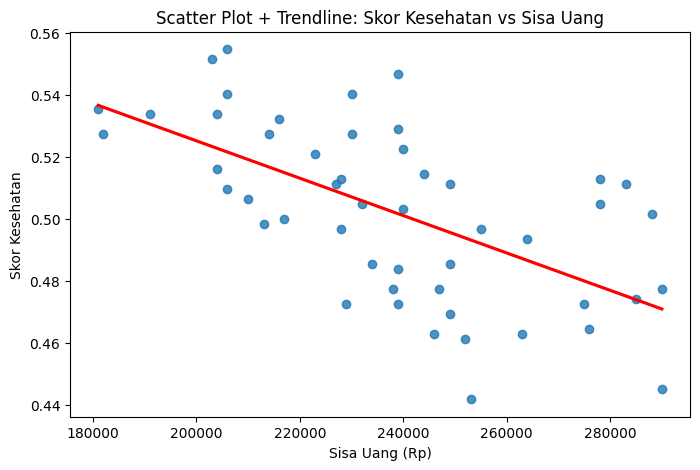

In [26]:
N_SAMPLE = 50     
N_HARI = 31
budget = 1000000

sisa_list = []
sehat_list = []

for _ in range(N_SAMPLE):
    total_harga = 0
    total_sehat = 0
    for hari in range(N_HARI*2):
        idx = np.random.choice(len(makan))
        total_harga += makan.loc[idx, "harga"]
        total_sehat += makan.loc[idx, "sehat"]
    
    sisa = budget - total_harga
    sisa_list.append(sisa)
    sehat_list.append(total_sehat / (N_HARI*2))  # rata-rata skor sehat

# buat DataFrame hasil
df_hasil = pd.DataFrame({
    "Sisa_Uang": sisa_list,
    "Skor_Sehat": sehat_list
})

# Scatter plot + trendline
plt.figure(figsize=(8,5))
sns.regplot(x="Sisa_Uang", y="Skor_Sehat", data=df_hasil, scatter=True, ci=None, line_kws={"color":"red"})
plt.title("Scatter Plot + Trendline: Skor Kesehatan vs Sisa Uang")
plt.xlabel("Sisa Uang (Rp)")
plt.ylabel("Skor Kesehatan")
plt.show()

Dari grafik dapat terlihat trendline miring ke bawah yang artinya terdapat hubungan negatif, semakin besar sisa uang, rata-rata skor kesehatan cenderung lebih rendah, sabaliknya semakin banyak uang dipakai, skor kesehatan cenderung lebih tinggi.

> Prompt GPT

Dari skor kesehatan dan sisa uang buatkan scatter plot atau visualisasi lain yang sesuai dengan data yang berisi rating tiap makanan berikan juga trendline untuk melihat pola hubungannya

Jawaban GPT:
Bisa banget 👍

Kita bisa bikin scatter plot yang menampilkan hubungan antara skor kesehatan makanan dengan sisa uang (misalnya budget yang digunakan tiap kali makan).

Kita juga bisa tambahkan trendline (garis kecenderungan) di scatter plot supaya kelihatan apakah ada pola hubungan antara sisa uang dan skor kesehatan.

Total pengeluaran: 919000.0
Sisa uang: 81000.0
Skor sehat rata-rata: 0.4967741935483871


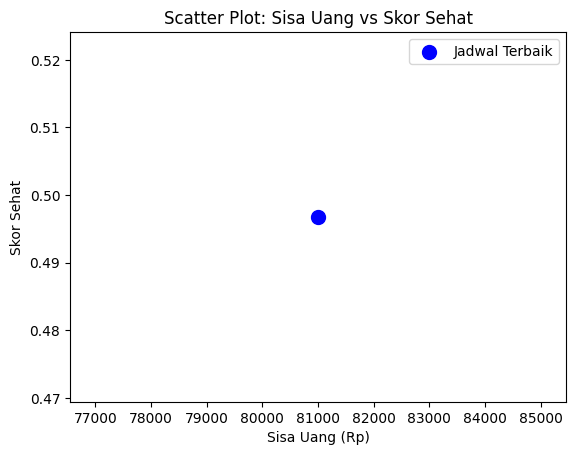

In [31]:
jadwal = resp_pilih[best_idx]  

total_pengeluaran = 0
total_sehat = 0
N_HARI = 31

for hari in range(N_HARI):
    pagi = int(jadwal[2*hari])
    malam = int(jadwal[2*hari+1])

    total_pengeluaran += makan.loc[pagi, "harga"]
    total_pengeluaran += makan.loc[malam, "harga"]

    total_sehat += makan.loc[pagi, "sehat"]
    total_sehat += makan.loc[malam, "sehat"]

sisa_uang = budget - total_pengeluaran
skor_sehat = total_sehat / (N_HARI*2)   # rata-rata skor sehat

print("Total pengeluaran:", total_pengeluaran)
print("Sisa uang:", sisa_uang)
print("Skor sehat rata-rata:", skor_sehat)

# --- visualisasi scatter plot untuk jadwal terbaik ini ---
plt.scatter(sisa_uang, skor_sehat, color="blue", s=100, label="Jadwal Terbaik")
plt.xlabel("Sisa Uang (Rp)")
plt.ylabel("Skor Sehat")
plt.title("Scatter Plot: Sisa Uang vs Skor Sehat")
plt.legend()
plt.show()

Hasil ini menunjukkan bahwa pola makan seimbang lebih dipilih dibanding jadwal yang hanya hemat tetapi tidak sehat atau yang sangat sehat tapi menghabiskan seluruh uang.

> Prompt GPT

Dari kode sebelumnya saya mendapatkan hasil scatter plot yang cukup menyebar dan bahkan hanya berisi 1 titik, apakah hasil tersebut bisa disimulasikan dengan lebih banyak jadwal dan bagaimana kemungkinan hasil yang didapatkan?

Jawaban GPT:

Oke, aku paham 👍
Memang kalau cuma ada 1 titik hasilnya jadi tidak informatif, karena scatter plot cocok untuk melihat penyebaran banyak kandidat solusi.

👉 Karena kamu ingin tahu hubungan antara sisa uang dan skor sehat, visualisasi yang lebih cocok ada beberapa opsi:

1. Scatter Plot Semua Jadwal (Pareto Frontier)

Loop semua jadwal simulasi (resp_pilih), lalu hitung sisa uang & skor sehat masing-masing.

Dengan begitu, muncul puluhan/ratusan titik → jadi terlihat trade-off antara hemat uang vs sehat.

Jadwal terbaik bisa ditandai dengan warna berbeda.

2. Bar Chart (Pengeluaran Harian vs Skor Sehat Harian)

Menampilkan pengeluaran per hari dan skor sehat rata-rata makanan hari itu.

Bisa menunjukkan kapan kamu boros dan apakah sebanding dengan kesehatan.

3. Line Plot (Trend Waktu)

Plot sisa uang kumulatif sepanjang hari (budget menurun).

Plot juga skor sehat kumulatif atau harian.

Ini membantu melihat trade-off sepanjang bulan, bukan hanya akhir.

4. Heatmap (Jenis Makanan vs Frekuensi Terpilih)

Kalau fokus ke apa yang dipilih, heatmap frekuensi makanan vs waktu bisa lebih jelas.

Misalnya, ayam geprek sering muncul → terlihat kontribusinya ke biaya & kesehatan.

⚡ Menurutku yang paling informatif untuk kasusmu adalah Scatter Plot Semua Jadwal + Line Plot Sisa Uang & Skor Sehat per Hari.
Dengan itu, kamu bisa lihat trade-off global (scatter) dan dinamikanya harian (line plot).

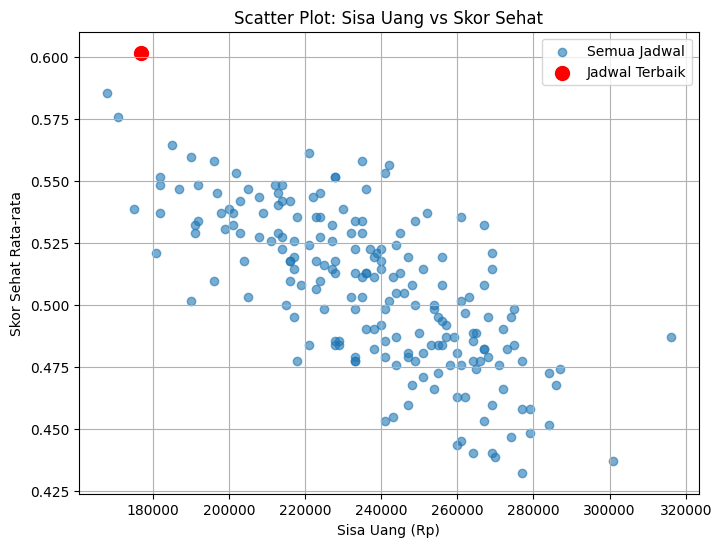

In [32]:
makan = pd.read_csv("makanan.csv")
budget = 1e6

# Simulasi banyak jadwal
N_SIM = 200
N_HARI = 31
jadwal_list = []
hasil = []

for _ in range(N_SIM):
    jadwal = []
    uang = budget
    skor_sehat_total = 0

    for hari in range(N_HARI):
        pagi = np.random.choice(len(makan))
        malam = np.random.choice(len(makan))
        jadwal.extend([pagi, malam])

        # hitung biaya & skor sehat harian
        biaya = makan.iloc[pagi]['harga'] + makan.iloc[malam]['harga']
        sehat = (makan.iloc[pagi]['sehat'] + makan.iloc[malam]['sehat']) / 2

        uang -= biaya
        skor_sehat_total += sehat

    # rata-rata skor sehat
    skor_sehat_total /= N_HARI

    jadwal_list.append(jadwal)
    hasil.append([uang, skor_sehat_total])

hasil = np.array(hasil)

# --- Scatter Plot: semua jadwal ---
plt.figure(figsize=(8,6))
plt.scatter(hasil[:,0], hasil[:,1], alpha=0.6, label="Semua Jadwal")

# cari jadwal terbaik (contoh: skor sehat tertinggi)
best_idx = np.argmax(hasil[:,1])
plt.scatter(hasil[best_idx,0], hasil[best_idx,1], color='red', s=100, label="Jadwal Terbaik")

plt.xlabel("Sisa Uang (Rp)")
plt.ylabel("Skor Sehat Rata-rata")
plt.title("Scatter Plot: Sisa Uang vs Skor Sehat")
plt.legend()
plt.grid(True)
plt.show()

Berdasarkan grafik tersebut jadwal terbaik paling optimal secara keseluruhan namun harus mengorbankan sedikit sisa uang. Pola ini menunjukkan bahwa untuk mencapai jadwal makan sehat, diperlukan alokasi anggaran yang lebih besar.

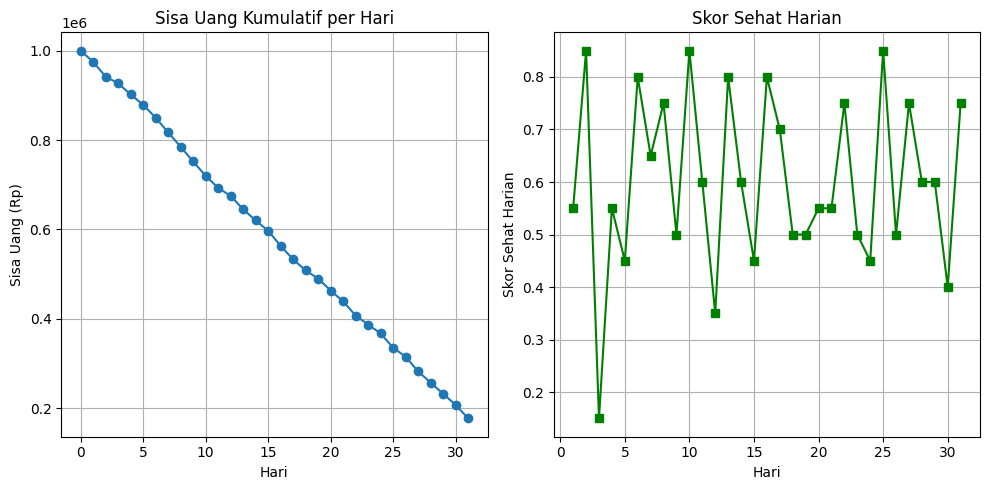

In [33]:
jadwal_best = jadwal_list[best_idx]
sisa_uang_harian = [budget]
skor_sehat_harian = []

uang = budget
for hari in range(N_HARI):
    pagi = jadwal_best[2*hari]
    malam = jadwal_best[2*hari+1]

    biaya = makan.iloc[pagi]['harga'] + makan.iloc[malam]['harga']
    sehat = (makan.iloc[pagi]['sehat'] + makan.iloc[malam]['sehat']) / 2

    uang -= biaya
    sisa_uang_harian.append(uang)
    skor_sehat_harian.append(sehat)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(range(N_HARI+1), sisa_uang_harian, marker='o')
plt.xlabel("Hari")
plt.ylabel("Sisa Uang (Rp)")
plt.title("Sisa Uang Kumulatif per Hari")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(range(1,N_HARI+1), skor_sehat_harian, marker='s', color='green')
plt.xlabel("Hari")
plt.ylabel("Skor Sehat Harian")
plt.title("Skor Sehat Harian")
plt.grid(True)

plt.tight_layout()
plt.show()

Pada visualisasi sisa uang kumulatif per hari polanya menurun hampir linear yang artinya pengeluaran harian relatif konsisten dan tidak ada lonjakan besar dalam pengeluaran di hari tertentu. Pada visualisasi grafik kanan skor sehat harian, terdapat hari dengan skor sangat tinggi (sekitar0,85) dan ada juga yang rendah (sekitar 0,1-0,2) namun secara umum rata-rata skor sehat cukup stabil di kisaran 0,6-0,7